[View in Colaboratory](https://colab.research.google.com/github/3to80/DeepLearning/blob/master/RL.ipynb)

## ffmpeg 안되는 경우
- https://stackoverflow.com/questions/41041138/what-does-matplotlib-need-to-know-about-ffmpegs-installation


In [1]:

!apt-get install ffmpeg
!apt-get update ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig i965-va-driver libaacs0 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2 libbs2b0
  libcaca0 libcairo2 libcdio-cdda2 libcdio-paranoia2 libcdio17 libchromaprint1
  libcroco3 libcrystalhd3 libdatrie1 libdc1394-22 libdrm-amdgpu1 libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libfftw3-double3 libflac8 libflite1
  libfribidi0 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common
  libgl1 libgl1-mesa-dri libglx-mesa0 libglx0 libgme0 libgsm1 libiec61883-0
  libjack-jackd2-0 libjbig0 libllvm6.0 libmp3lame0 libmpg123-0 libmysofa0
  libnuma1 libogg0 libopenal-data libopenal1 libopenjp2-7 libopenmpt0 libopus0
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpciaccess0
  libpixman-1-0 libpostproc54 libpu

In [2]:
import matplotlib.animation as ma
ma.FFMpegWriter.bin_path()

'ffmpeg'

In [3]:
ma.FFMpegWriter.exec_key

'animation.ffmpeg_path'

In [4]:
ma.FFMpegWriter.isAvailable()

True

In [5]:
import matplotlib as mpl

mpl.rcParams['animation.ffmpeg_path']

'ffmpeg'

In [6]:
mpl.rcParams['animation.ffmpeg_path'] = 'jibberish'
ma.FFMpegWriter.isAvailable()

False

In [0]:
mpl.rcParams['animation.ffmpeg_path'] = 'ffmpeg'

In [8]:
ma.FFMpegWriter.isAvailable()

True

In [9]:
import matplotlib.animation as animation
print(animation.writers.list())

['ffmpeg', 'ffmpeg_file', 'html']


In [0]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os
import sys

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
from IPython.display import HTML
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [11]:
!apt-get install ffmpeg
!apt-get update ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
E: The update command takes no arguments


In [0]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # 문제없음, OpenAI 짐의 렌더링 함수를 사용합니다
except Exception:
    openai_cart_pole_rendering = False  # 가능한 X 서버가 없다면, 자체 렌더링 함수를 사용합니다

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # OpenAI 짐의 렌더링 함수를 사용합니다
        return env.render(mode="rgb_array")
    else:
        # Cart-Pole 환경을 위한 렌더링 (OpenAI 짐이 처리할 수 없는 경우)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # 파랑 초록 빨강
        pole_col = 0x669acc # 파랑 초록 빨강

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
def update_scene(num, frames, patch):
    plt.close()  # 이전 그래프를 닫지 않으면 두 개의 그래프가 출력되는 matplotlib의 버그로 보입니다.
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, figsize=(5,6), repeat=False, interval=40):
    fig = plt.figure(figsize=figsize)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), 
                                   frames=len(frames), repeat=repeat, interval=interval)    

In [13]:
!pip3 install --upgrade gym

    100% |████████████████████████████████| 1.5MB 12.0MB/s 
    100% |████████████████████████████████| 1.0MB 21.6MB/s 
  Running setup.py bdist_wheel for gym ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/ea/ec/dd/33bcc8801d345f0b640fced8a0864a7c8474828564bc5ccf70
Successfully built gym


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


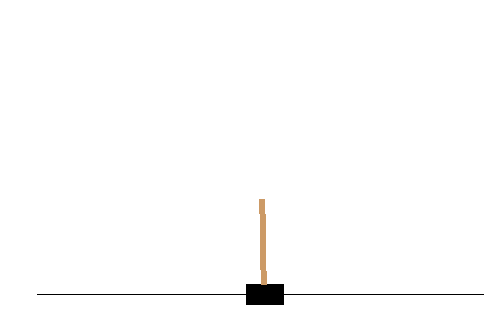

In [14]:
import gym
env = gym.make("CartPole-v0")
obs =env.reset()
plot_cart_pole(env, obs)

In [15]:
env.action_space

Discrete(2)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


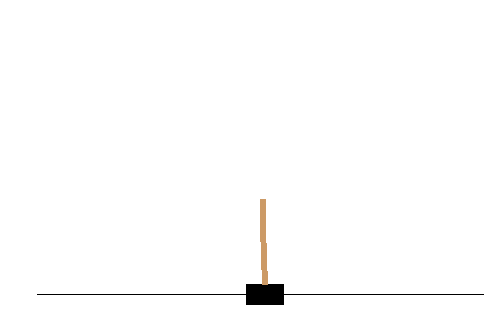

In [16]:
action = 1
obs, reward, done, info = env.step(action)

plot_cart_pole(env, obs)

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


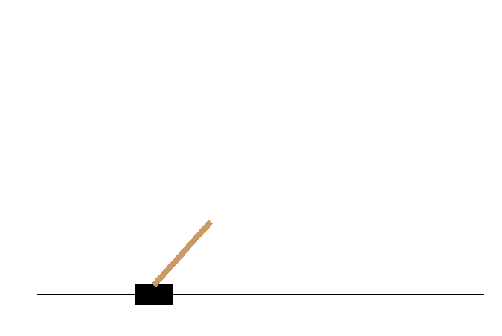

In [17]:
action = 1
env.reset()
action = 1- action

obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
plot_cart_pole(env, obs)

In [0]:
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

In [0]:
frames = []

n_max_steps = 10000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)

    # hard-coded policy
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [20]:
video = plot_animation(frames, figsize=(6,4))
HTML(video.to_html5_video())  

In [0]:
import tensorflow as tf

In [0]:

# 신경망 구조 정의
n_inputs = 4
n_hidden = 4
n_outputs = 1
initializer = tf.contrib.layers.variance_scaling_initializer()

# 신경망 구성
# placehodler : sesson 실행할 때 feed_dict로 값넘길 수 있는거
X = tf.placeholder(tf.float32, shape = [None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation = tf.nn.elu, 
                        kernel_initializer = initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer = initializer)
# output이 left or right이니 sigmoid. 
outputs = tf.nn.sigmoid(logits)

# 추정된 확률을 기반으로 랜덤하게 행동 선택
p_left_and_rights = tf.concat(axis=1, values = [outputs, 1-outputs])

#multinomial :  로그 확률들이 담긴 arr이 들어왔을 때 하나의 정수를 선택
#[np.log(0.5) , np.log(0.2), np.log(0.3)] 이런 1*n 배열과 num_samples = 5
# 일 때, 50% 확률로 0, 20%확률로 1, 30% 확률로 2를 선택해서 다섯 개의 정수 출력
# actionspace가 2이므로 왼쪽 확률이 p일 때 오른 쪽 확률은 1-p 가되니, concat 
action = tf.multinomial(tf.log(p_left_and_rights), num_samples=1)

init = tf.global_variables_initializer()


In [0]:
# game

n_max_steps = 1000
frames = []

with tf.Session() as sess:
  init.run()
  obs = env.reset()
  for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)
    action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
    obs, reward, done, info = env.step(action_val[0][0])
    if done:
      break
  
env.close()

In [24]:
#간단한 신경망 검증
video = plot_animation(frames, figsize=(6,4), interval= 40)
HTML(video.to_html5_video())  # HTML5 동영상으로 만들어 줍니다

In [0]:
# 기본 정책잉ㅇ
# 기본정책 : 막대가 왼쪽으로 기울어지면(action[2] < 0)  오른쪽으로 기울이기. 

import tensorflow as tf

reset_graph()

n_inputs= 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

inititalizer = tf.contrib.layers.variance_scaling_initializer()

X= tf.placeholder(tf.float32, shape = [None, n_inputs])
y = tf.placeholder(tf.float32, shape = [None, n_outputs])

with tf.name_scope("dnn"):  
  hidden = tf.layers.dense(X, n_hidden, activation= tf.nn.elu, kernel_initializer= initializer)
  logits = tf.layers.dense(hidden, n_outputs)
  outputs = tf.nn.sigmoid(logits) # action 0(왼쪽) 일 때 확률
  #sampling
  p_left_and_right = tf.concat(axis=1, values= [outputs, 1-outputs])
  #action 고를 때 랜덤성을 이용한다. 찾아낸 것보다 더 좋은 게 있을 수도 있기 때문
  action = tf.multinomial(tf.log(p_left_and_right), num_samples = 1)
  
with tf.name_scope("train"):
  cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits = logits)
  optimizer = tf.train.AdamOptimizer(learning_rate)
  training_op = optimizer.minimize(cross_entropy)
  
init = tf.global_variables_initializer()
saver = tf.train.Saver()
  


동일한 네트워크를 동시에 10개의 다른 환경에서 플레이, 1000번 반복. 완료되면 환경 리셋

In [0]:
n_env = 10
n_iterations= 1000

envs = [gym.make("CartPole-v0") for _ in range(n_env)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
  init.run()
  for iteration in range(n_iterations):
    # angle<0 이면 proba(left) = 1, 아님 0 
    # 왼쪽으로 기울었을 때 왼쪽으로 가는게 좋은 행동이라고 하자.
    target_proba =np.array( [ ([1.] if obs[2] < 0 else [0.])  for obs in observations] )
    # 그럼 트레이닝을 하며 나온 추정치와 target_proba(알고 있는 좋은 행동)의
    # 크로스 엔트로피를 최소화하는 방향으로 학습을 하자 train name_Scope 참조
    action_val, _ = sess.run([action, training_op], feed_dict= {X: np.array(observations),
                                                               y : target_proba})
    for env_index, env in enumerate(envs):
      obs, reward, done, info = env.step(action_val[env_index][0])
      observations[env_index] = obs if not done else env.reset()
  saver.save(sess, "./my_policy_net_basic.ckpt")
  
for env in envs:
  env.close()

In [0]:
# rendering policy

rewards = []

def render_policy_net(model_path, action, X, n_max_steps = 1000):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        epi_rewards = 0
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            epi_rewards += reward
            if done:
                break
        rewards.append(epi_rewards)

    env.close()
    return frames        

In [28]:
frames = render_policy_net("./my_policy_net_basic.ckpt", action, X)
video = plot_animation(frames, figsize=(6, 4))
HTML(video.to_html5_video())

INFO:tensorflow:Restoring parameters from ./my_policy_net_basic.ckpt


In [29]:
rewards

[42.0]

## Policy Gradient

1) 신경망 정책이 여러 번에 걸쳐 게임을 플레이하고, 매 스텝마다 선택된 행동이 더 높은 가능성을 가지도록 만드는 gradient를 계산한다.

2) 몇 번의 에피소드를 실행한 다음, 각 행동의 점수를 계산한다. (discount factor 적용시켜서)

3) 한 행동의 점수가 양수면 이 행동은 좋은 것을 의미, 미래에 선택될 가능성을 높히기 위해 앞서 계산한 그레이디언트에 적용시킨다. 음수라면 미래 선택가능성을 낮추기 위해 그레디언트에 적용

4) 마지막 모든 결과 그레디언트 벡터를 평균 내어 경사하강법을 수행

In [0]:
import tensorflow as tf

reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)  # 행동 0(왼쪽)에 대한 확률
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
# 원본 보상을 받아서 할인된 전체 보상을 계산
# 여러 에피소드에 걸친 결과를 정규화하는 두 개의 함수가 필요
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

In [32]:
env = gym.make("CartPole-v0")

n_games_per_update = 10
n_max_steps = 1000
n_iterations = 250
save_iterations = 10
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      
        print("\r반복: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
#### n_games_per_update 만큼 먼저 시행을 한다. 각 action이 얼마나 좋을지.. ? 

        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            
            for step in range(n_max_steps):
                # 이 obs가 들어왔을 때 골라야할 action, gradient를 구한다. 
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                #action_val[0][0] : 예측한 action 값,
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            # update계산을 위해 넣는다. 
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)
####
        #앞서 언급한 알고리즘을 사용해 정책을 업데이트할 준비. 
        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)  
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            # 그레디언트와 행동 점수를 곱하고 평균을 계산한다. 
            mean_gradients = np.mean(
                [reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                      for step, reward in enumerate(rewards)], 
                axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./my_policy_net_pg.ckpt")

반복: 249

In [0]:
env.close()

In [34]:
frames = render_policy_net("./my_policy_net_pg.ckpt", action, X, n_max_steps=1000)
video = plot_animation(frames, figsize=(6,4))
HTML(video.to_html5_video())  # HTML5 동영상으로 만들어 줍니다

INFO:tensorflow:Restoring parameters from ./my_policy_net_pg.ckpt


# 간접 Policy 추정 방법
- 각 State에서 미래에 얻을 수 있는 값의 기대값들을 계산. 
  - Q(s,a) 를 계산하고, 이 것을 이용해 최대가 되는 action들을 구한다. 
  - action을 직접적으로 최적화하는 pg와 이 점에서 다름. value 찾아보고 나오는 action을 구한다. 

In [0]:
T = [ # T (s, a, s')
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], 
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None],
    ]

R = [ # R (s, a, s')
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
    ]

# 각 State에서 갈 수 있는 action
possible_actions = [[0, 1, 2], [0, 2], [1]]


In [0]:
import numpy as np

# Q(s, a)를 구하자
n_iteration = 100
discount_factor = 0.95

# Q(s, a) 는 s에서 어떤 행동 a를 할 때 얻을 수 있는 기댓값 
# Q(s, a) <- sum_s' [ T(s, a, s') * [R(s, a, s') + d_factor * max_a' Q(s', a')] ]
# s에서 할 행동 a는 argmax_a Q*(s, a)

# 불가능한 행동은 -inf. 
# state는 3개, 최대 행동은 3개 
Q = np.full( ( 3,3), -np.inf)

# 0으로 초기화
for state, actions in enumerate(possible_actions):
  Q[state, actions] = 0.0

# Q(s, a) 계산
# Q(s, a) <- sum_s' [ T(s, a, s') * [R(s, a, s') + d_factor * max_a' Q(s', a')] ]
for iter in range(n_iterations):
  Q_prev = Q.copy()
  for s in range(3):
    for a in possible_actions[s]:
      Q[s, a] = np.sum([
          
          T[s][a][sp] * (R[s][a][sp] + discount_factor * np.max(Q_prev[sp]))
          for sp in range(3)
      ])

In [37]:
Q

array([[21.89924423, 20.80428172, 16.86759006],
       [ 1.1208234 ,        -inf,  1.17981441],
       [       -inf, 53.87348916,        -inf]])

In [38]:
np.argmax(Q, axis=1)

array([0, 2, 1])

##DQN - Pacman을 통한 deepmind dqn 구현

In [0]:
import gym

In [42]:
!pip3 install gym[atari]

  Using cached https://files.pythonhosted.org/packages/9c/1d/4544708aaa89f26c97cc09450bb333a23724a320923e74d73e028b3560f9/PyOpenGL-3.1.0.tar.gz
    100% |████████████████████████████████| 1.7MB 15.1MB/s 
  Running setup.py bdist_wheel for PyOpenGL ... - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/6c/00/7f/1dd736f380848720ad79a1a1de5272e0d3f79c15a42968fb58
Successfully built PyOpenGL


In [43]:
env = gym.make("MsPacman-v0")
obs = env.reset()
obs.shape

(210, 160, 3)

In [44]:
env.action_space

Discrete(9)

(210, 160, 3) 3d numpy를 이미지를 잘라 (88,80,1)로 전처리

In [0]:
mspacman_color = 210 + 164 + 74

def preprocess_observation(obs):
    img = obs[1:176:2, ::2] # 자르고 크기를 줄입니다.
    img = img.sum(axis=2) # 흑백 스케일로 변환합니다.
    img[img==mspacman_color] = 0 # 대비를 높입니다.
    img = (img // 3 - 128).astype(np.int8) # -128~127 사이로 정규화합니다.
    return img.reshape(88, 80, 1)

img = preprocess_observation(obs)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


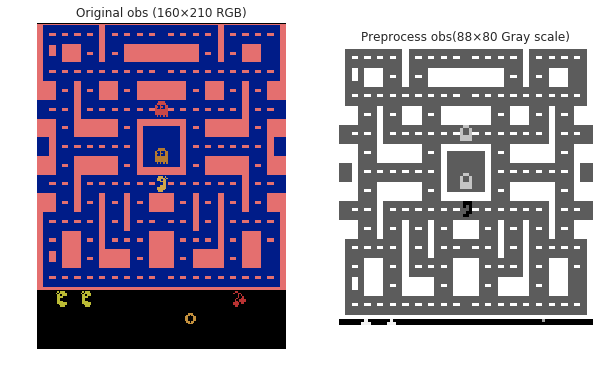

In [57]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.title("Original obs (160×210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(122)
plt.title("Preprocess obs(88×80 Gray scale)")
plt.imshow(img.reshape(88, 80), interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()

### Network 설계
- 딥마인드에서 고안한 DQN 훈련 알고리즘은 동일한 DQN 두 개(모델 파라미터는 다른)를 사용한다. 
  - Online DQN은 팩맨을 조정하는 법을 배운다
  - Target DQN은 온라인 DQN을 훈련하기 위한 타깃 Q-value를 만드는데 사용된다. 

-> 일정 간격마다 온라인 네트워크의 가중치가 타깃 네트워크로 복사된다.
  - 하나의 네트워크만이 있으면 자기 꼬리를 자기가 쫓는 피드백 루프를 생성한다. 
  - 두 개의 네크워크를 구성함으로써 이런 피드백 루프를 감소시키고 훈련 과정을 안정화시키는데 도움을 준다. 


### network 구성 

In [0]:
import tensorflow as tf


# DQN 만들기
# input
input_height = 88
input_width = 80
input_channel = 1

# conv layer 3개
conv_n_fmaps = [32, 64, 64]
conv_kernel_size = [(8, 8), (4, 4), (3, 3)]
conv_strides = [4, 2, 1]
conv_paddings=["SAME"] * 3
conv_activation = [tf.nn.relu] * 3

# hidden
n_hidden_in = 11*10 * 64
n_hidden = 512
hidden_activation = tf.nn.relu
# output
n_outputs = env.action_space.n
initializer = tf.contrib.layers.variance_scaling_initializer()

# 환경의 상태인 X_STATE와 변수 범위의 이름을 입력으로 받음,  여기에는 숨겨진 상태가 거의 없으므로, 
# 환경의 상태를 표현하는데 하나의 관측만 사용한다.
#PONG 게임 같은 경우, 마지막 몇 개의 관측을 연결해서 하나의 환경상태를 만들어야 한다. 

def q_network(X_state, name):
  prev_layer = X_state
  with tf.variable_scope(name) as scope:
    # conv layer 3개 쌓기
    for n_maps, kernel_size, strides, padding, activation in zip(
    conv_n_fmaps, conv_kernel_size, conv_strides, conv_paddings, conv_activation):
      prev_layer = tf.layers.conv2d(prev_layer, filters=n_maps, kernel_size = kernel_size, 
                                    strides = strides, padding = padding, activation = activation, kernel_initializer = initializer)
    # last_layer
    last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
    hidden = tf.layers.dense(last_conv_layer_flat, n_hidden, 
                            activation = hidden_activation, 
                            kernel_initializer = initializer)
    outputs = tf.layers.dense(hidden, n_outputs, kernel_initializer= initializer)
  # dqn에 있는 모든 훈련 가능한 변수를 담는다. 나중에 온라인 dqn을 타깃 dqn으로 복하는 연산을 만들 때 사용  
  trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 
                                    scope = scope.name)
  
  trainable_vars_by_name = {
      var.name[len(scope.name):]: var
      for var in trainable_vars}
  
  return outputs, trainable_vars_by_name
    



In [0]:
tf.reset_default_graph()
# 입력부 

X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width, input_channel])

#Online dqn
online_q_values, online_vars = q_network(X_state, name="q_networks/online")
#Target dqn
target_q_values, target_vars = q_network(X_state, name="q_networks/target")


copy_ops = [target_var.assign(online_vars[var_name])
           for var_name, target_var in target_vars.items()]
copy_online_to_target = tf.group(*copy_ops)


In [77]:
# online dqn의 훈련 연산을 추가 
# 먼저 메모리 배치에 있는 각 상태-행동에 대한 예측 q-value를 계산 
# dqn은 가능한 모든 행동에 대해 하나의 q 가치를 출력하므로d, 실제로 플레이된 행동에 상응하는 q 가치만 저장해야 한다. 

X_action = tf.placeholder(tf.int32, shape=[None])
q_value = tf.reduce_sum(online_q_values * tf.one_hot(X_action, n_outputs), axis=1, keep_dims=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
y = tf.placeholder(tf.float32, shape=[None, 1])
error = tf.abs(y - q_value)
clipped_error = tf.clip_by_value(error, 0.0, 1.0)
linear_error = 2 * (error - clipped_error)
loss = tf.reduce_mean(tf.square(clipped_error) + linear_error)

In [0]:
learning_rate = 0.01
momentum = 0.95

global_step = tf.Variable(0, trainable= False, name='global_step')
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov = True)
training_op = optimizer.minimize(loss, global_step = global_step)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
# 재현 메모리 구현. 
# 재현 메모리는 deque, 재현 메모리에서 배치를 무작위로 샘플링 하기 위해 간단한 함수를 생성 
# 각 경험 데이터는 5개의 튜플 ( s, a , r, s', done) 

from collections import deque

replay_memory_size = 500000
replay_memory = deque([], maxlen=replay_memory_size)

def sample_memories(batch_size):
  indices = np.random.permutation(len(replay_memory))[:batch_size]
  cols = [[], [], [], [], []] # 상태, 행동, 보상, 다음 상태, 계속
  for idx in indices:
    memory = replay_memory[idx]
    for col, value in zip(cols, memory):
      col.append(value)
  cols = [np.array(col) for col in cols]
  return (cols[0], cols[1], cols[2].reshape(-1, 1), cols[3], cols[4].reshape(-1, 1))

In [0]:
# 게임을 탐험할 에이전트가 필요. e-greedy 정책 사용

eps_min = 0.1
eps_max = 1.0
eps_decay_steps = 2000000

def epsilon_greedy(q_values, step):
  epsilon = max(eps_min, eps_max - (eps_max-eps_min)* step/eps_decay_steps)
  if np.random.rand() < epsilon:
    return np.random.randint(n_outputs)
  else:
    return np.argmax(q_values)

### 실행

In [0]:
# hyper param 설정

n_steps = 4000000
training_start = 10000 # 10,000 반복후 훈련 시작

training_interval  = 4 # 4게임 반복마다 훈련 스텝 실행

save_steps = 1000 # 1000 훈련 스텝마다 모델 저장
copy_steps = 10000 # 10000 훈련 스텝마다 온라인 DQN을 타깃 DQN에 복사
discount_factor = 0.99
skip_start = 90 # 매 게임 시작을 스킵
batch_size = 50
iteration = 0
checkpoint_path = "./my_dqn.ckpt"
done = True

In [0]:
with tf.Session() as sess:
  if os.path.isfile(checkpoint_path + ".index"):
    saver.restore(sess, checkpoint_path)
  else:
    init.run()
    copy_online_to_target.run()
    while True:
      step = global_step.eval()
      # traing_op를 n_step만큼 시키면 break
      if step >= n_steps:
        break
      iteration += 1
      
      if done : #게임 종료, 재시작
        obs = env.reset()
        for skip in range(skip_start):
          obs, reward, done, info = env.step(0)
        state = preprocess_observation(obs)
      
      # 온라인 dqn이 해야 할 일을 평가한다.
      q_values = online_q_values.eval(feed_dict={X_state: [state]})
      action = epsilon_greedy(q_values, step)
      # online dqn을 시작한다
      obs, reward, done, info = env.step(action)
      next_state = preprocess_observation(obs)
      
      # 일어난 일을 기억한다
      replay_memory.append((state, action, reward, next_state, 1.0 - done))
      state = next_state
      
      if iteration< training_start or iteration % training_interval != 0:
        continue 
      
      # 메모리를 샘플링하고 target q-value를 만들기 위해 target dqn을 사용한다.
      X_state_val, X_action_val, rewards, X_next_state_val, continues = (sample_memories(batch_size))
      next_q_values = target_q_values.eval(
        feed_dict = {X_state: X_next_state_val})
      max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
      # 식 적용, 게임 종료시 미래 가치를 0으로 만든다 
      y_val = rewards + continues * discount_factor * max_next_q_values
      
      # online dqn 훈련
      training_op.run(feed_dict = {X_state: X_state_val, X_action: X_action_val, y: y_val})
      
      # 정기적으로 온라인 dqn을 타깃 dqn으로 복사
      if step % copy_steps == 0:
        copy_online_to_target.run()
      
      #일정 간격으로 저장
      if step% save_steps == 0:
        saver.save(sess,checkpoint_path)
        
        

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


In [0]:
frames = []
n_max_steps = 10000

with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)

    obs = env.reset()
    for step in range(n_max_steps):
        state = preprocess_observation(obs)

        # 온라인 DQN이 해야할 행동을 평가합니다
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = np.argmax(q_values)

        # 온라인 DQN이 게임을 플레이합니다
        obs, reward, done, info = env.step(action)

        img = env.render(mode="rgb_array")
        frames.append(img)

        if done:
            break